# Output file for manual splitting
Makesuse of scopus output as well as manual cleaning output to produce a final combined count of affiliations.

In [1]:
import pandas as pd
import numpy as np
JPE_sorted = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/JPE_filtered_Finalv2_cumcount.xlsx')
QJE_sorted = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/QJE_SCOPUS_filtered_Finalv2_cumcount.xlsx')
RES_sorted = pd.read_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/RES_SCOPUS_filtered_Finalv2_cumcount.xlsx')

In [2]:
JPE_sorted = JPE_sorted[['year','Affilliation']]
QJE_sorted = QJE_sorted[['year','Affilliation']]
RES_sorted = QJE_sorted[['year','Affilliation']]

combined_sorted0 = JPE_sorted.append(QJE_sorted, ignore_index=True)
combined_sorted = combined_sorted0.append(RES_sorted, ignore_index=True)
print(JPE_sorted.shape)
print(QJE_sorted.shape)
print(combined_sorted.shape)
print(combined_sorted.head)


(10858, 2)
(5879, 2)
(22616, 2)
<bound method NDFrame.head of        year                          Affilliation
0      1940                 University Of Arizona
1      1940                                    DC
2      1940                                    DC
3      1940                  Central YMCA College
4      1940                            Washington
...     ...                                   ...
22611  2020          Berkeley Stanford University
22612  2020             Michigan State University
22613  2020                               Quantco
22614  2020  National Bureau Of Economic Research
22615  2020            London School Of Economics

[22616 rows x 2 columns]>


/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/101987650.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted0 = JPE_sorted.append(QJE_sorted, ignore_index=True)
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/101987650.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted = combined_sorted0.append(RES_sorted, ignore_index=True)


In [3]:
# Additional split on and
list = combined_sorted.Affilliation.str.split(" And ", expand = True)
print(list.shape)
combined_sorted = combined_sorted.replace(np.nan, '', regex=True)
combined_sorted['aff1'] = list[0]
combined_sorted['aff2'] = list[1] 
combined_sorted['aff3'] = list[2] 

combined_sorted_filtered = combined_sorted[['year','aff1','aff2','aff3']]
print(combined_sorted_filtered.shape)
print(combined_sorted_filtered.head)

combined_sorted_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/combined_sorted_filtered.xlsx')

(22616, 4)
(22616, 4)
<bound method NDFrame.head of        year                                  aff1  aff2  aff3
0      1940                 University Of Arizona  None  None
1      1940                                    DC  None  None
2      1940                                    DC  None  None
3      1940                  Central YMCA College  None  None
4      1940                            Washington  None  None
...     ...                                   ...   ...   ...
22611  2020          Berkeley Stanford University  None  None
22612  2020             Michigan State University  None  None
22613  2020                               Quantco  None  None
22614  2020  National Bureau Of Economic Research  None  None
22615  2020            London School Of Economics  None  None

[22616 rows x 4 columns]>


In [4]:
#Additonal split on comma on first column
list = combined_sorted_filtered.aff1.str.split(", ", expand = True)
print(list.shape)

combined_sorted_filtered['aff31'] = list[0]
combined_sorted_filtered['aff32'] = list[1] 
#QJE_SCOPUS_filtered.tail()
combined_sorted_filtered = combined_sorted_filtered.replace(np.nan, '', regex=True)

for i in range(len(combined_sorted_filtered['aff31'])):
    if combined_sorted_filtered['aff31'].iat[i] is not None:
        if len(combined_sorted_filtered['aff31'].iat[i].strip()) < 3:
            combined_sorted_filtered['aff31'].iat[i] = ''
    else:
        combined_sorted_filtered['aff31'].iat[i] = ''

for i in range(len(combined_sorted_filtered['aff32'])):
    if combined_sorted_filtered['aff32'].iat[i] is not None:
        if len(combined_sorted_filtered['aff32'].iat[i].strip()) < 3:
            combined_sorted_filtered['aff32'].iat[i] = ''
    else:
        combined_sorted_filtered['aff32'].iat[i] = ''

#for i in range(len(list)):
 #   if list.iat[i,1] is not None:
  #      if len(list.iat[i,1]) < 4:
   #         QJE_SCOPUS_filtered['aff12'].iat[i] = ''

combined_sorted_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/combined_sorted_filtered2.xlsx')

(22616, 5)


In [5]:
#Combining the 2 previos splits into 1 dataframe
combined_sorted_filtered_final = pd.DataFrame()

combined_sorted_filtered = combined_sorted_filtered[['year','aff2','aff3',
                                                        'aff31','aff32'
                                                        ]]
combined_sorted_filtered.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/test.xlsx')

In [6]:
#Creating 1 column of all the affiliations

combined_sorted_filtered = combined_sorted_filtered.replace(np.nan, '', regex=True)

for j in range(1,5):
    for i in range(len(combined_sorted_filtered)):
        if combined_sorted_filtered.iat[i,j] != '':
            combined_sorted_filtered_final = combined_sorted_filtered_final.append(
            {'year': combined_sorted_filtered.iat[i,0], 'Affilliation':combined_sorted_filtered.iat[i,j]}
            ,ignore_index=True)
print(combined_sorted_filtered_final.shape)
combined_sorted_filtered_final.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/combined_sorted_filtered_final.xlsx')

/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/3985810521.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/3985810521.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/3985810521.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_sorted_filtered_final = combined_sorted_filtered_final.append(
/var/folders/23/ft9qf9c11rj_vqhbjml910f40000gn/T/ipykernel_2557/3985810521.py:8: FutureWarning: The frame.append method is deprecated an

(24173, 2)


In [44]:
from rapidfuzz import fuzz

x = 0

combined_sorted_filtered_final = combined_sorted_filtered_final.replace(np.nan, '', regex=True)
for i in range(len(combined_sorted_filtered_final)):
    #Replaceing title case and stripping leading space
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].strip().title()
    combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].rstrip(',')

    # Replace Nber with National Bureau of Economic
    if combined_sorted_filtered_final.iat[i,1] == 'Nber':
        combined_sorted_filtered_final.iat[i,1] = combined_sorted_filtered_final.iat[i,1].replace("Nber", "National Bureau Of Economic Research")

    NBER_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"N.B.E.R")
    if NBER_Fuzz >85 :
        print(combined_sorted_filtered_final.iat[i,1]) 
        combined_sorted_filtered_final.iat[i,1] = "National Bureau Of Economic Research"
        print(combined_sorted_filtered_final.iat[i,1])    

    National_Bureau_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"National Bureau Of Economic Research")
    if National_Bureau_Fuzz >85 and National_Bureau_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "National Bureau Of Economic Research"
        print(combined_sorted_filtered_final.iat[i,1])

    MIT_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Massachusetts Institute Of Technology")
    if MIT_Fuzz >85 and MIT_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])

    Mitsmall_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Mit")
    if Mitsmall_Fuzz >80:
        combined_sorted_filtered_final.iat[i,1] = "Massachusetts Institute Of Technology"
        print(combined_sorted_filtered_final.iat[i,1])

    Cepr_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cepr")
    if Cepr_Fuzz >80:
        combined_sorted_filtered_final.iat[i,1] = "Centre for Economic Policy Research "
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Harvard_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Harvard University")
    if Harvard_Fuzz >90 and Harvard_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Harvard University"
        print(combined_sorted_filtered_final.iat[i,1])

    Yale_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Yale University")
    if Yale_Fuzz >90 and Yale_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Yale University"
        print(combined_sorted_filtered_final.iat[i,1])

    California_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of California")
    if California_Fuzz > 90 and California_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of California"
        print(combined_sorted_filtered_final.iat[i,1])

    Columbia_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Columbia University")
    if Columbia_Fuzz > 85 and Columbia_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Columbia University"
        print(combined_sorted_filtered_final.iat[i,1])
        x =x+1

    Stanford_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Stanford University")
    if Stanford_Fuzz > 85 and Stanford_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Stanford University"
        print(combined_sorted_filtered_final.iat[i,1])

    Princeton_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Princeton University")
    if Princeton_Fuzz > 85 and Princeton_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "Princeton University"
        print(combined_sorted_filtered_final.iat[i,1])



    Chicago_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Chicago")
    if Chicago_Fuzz > 85 and Chicago_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Chicago"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University Of Cambridge")
    if Cambridge_Fuzz > 90 and Cambridge_Fuzz < 100:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    Cambridge_Fuzz1 = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Cambridge University")
    if Cambridge_Fuzz1 > 90:
        combined_sorted_filtered_final.iat[i,1] = "University Of Cambridge"
        print(combined_sorted_filtered_final.iat[i,1])	
        x =x+1

    # UC campuses: Berkeley, Santa Barbara, Davis, Los Angeles (UCLA), Riverside, Mercedd, San Diego, San Francisco, Santa barbara, Santa Cruz
    Berkeley_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Berkeley")
    if Berkeley_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Berkeley"
        print(combined_sorted_filtered_final.iat[i,1])	

    UCLA1_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Los Angeles")
    if UCLA1_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Los Angeles"
        print(combined_sorted_filtered_final.iat[i,1])	

    UCLA2_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"UCLA")
    if UCLA2_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Los Angeles"
        print(combined_sorted_filtered_final.iat[i,1])	

    UCLA3_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University of California Los Angeles")
    if UCLA3_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Los Angeles"
        print(combined_sorted_filtered_final.iat[i,1])	

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"University of California Berkeley")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Berkeley"
        print(combined_sorted_filtered_final.iat[i,1])	

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Davis")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Davis"
        print(combined_sorted_filtered_final.iat[i,1])

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Irvine")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Irvine"
        print(combined_sorted_filtered_final.iat[i,1])		

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Merced")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Merced"
        print(combined_sorted_filtered_final.iat[i,1])		

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Riverside")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Riverside"
        print(combined_sorted_filtered_final.iat[i,1])		

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"San Diego")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ San Diego"
        print(combined_sorted_filtered_final.iat[i,1])	

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"San Francisco")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ San Francisco"
        print(combined_sorted_filtered_final.iat[i,1])	

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Santa Barbara")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Santa Barbara"
        print(combined_sorted_filtered_final.iat[i,1])	

    UC_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Santa Cruz")
    if UC_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University of California _ Santa Cruz"
        print(combined_sorted_filtered_final.iat[i,1])	

    UCL_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"London")
    if UCL_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University College London"
        print(combined_sorted_filtered_final.iat[i,1])

    UCL_Fuzz = fuzz.ratio(combined_sorted_filtered_final.iat[i,1],"Univeristy college London")
    if UCL_Fuzz > 85:
        combined_sorted_filtered_final.iat[i,1] = "University College London"
        print(combined_sorted_filtered_final.iat[i,1])		



University of California _ Berkeley
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Los Angeles
University College London
University of California _ Los Angeles
University College London
University of California _ Los Angeles
University of California _ Berkeley
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Berkeley
University of California _ Los Angeles
University of California _ Berkeley
University of California _ Berkeley
University of California _ Los Angeles
University of California _ Berkeley
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Los Angeles
University of California _ Berkeley
University of California _ Berkeley
University of California _ Berkeley
University of California _ Berkeley
University of California _ Los Angeles
Uni

In [45]:
#Grouping into a cumullative count
Combined_cumcount = combined_sorted_filtered_final.sort_values(by=['year'])
Combined_cumcount['aff_cum_counts'] = Combined_cumcount.groupby('Affilliation').cumcount()
Combined_cumcount.tail()
Combined_cumcount.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/Combined_cumcount.xlsx')

In [46]:
print(Combined_cumcount.shape)
test2  = Combined_cumcount[Combined_cumcount['aff_cum_counts'] > 20]
print(test2.shape)
print(test2.tail)
test2.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/test2.xlsx')

(24173, 3)
(13381, 3)
<bound method NDFrame.tail of        year                          Affilliation  aff_cum_counts
17683  1941                    Harvard University              21
17673  1941                    Harvard University              22
17675  1941                    Harvard University              23
17676  1941                    Harvard University              24
11794  1941                    Harvard University              25
...     ...                                   ...             ...
23379  2020  National Bureau Of Economic Research            1803
23381  2020                    Harvard University            1138
23382  2020              University Of California            1005
23362  2020  National Bureau Of Economic Research            1804
17613  2020  National Bureau Of Economic Research            1805

[13381 rows x 3 columns]>


In [26]:
affs_unique = test2.filter(items=['Affilliation']).drop_duplicates()
affs_unique1 = affs_unique['Affilliation']
affs_unique1.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/affs_unique1.xlsx')

affs_unique2 = Combined_cumcount.filter(items=['Affilliation']).drop_duplicates()
affs_unique3 = affs_unique2['Affilliation']
affs_unique3.to_excel('/Users/MattJohnson/Desktop/Refs + affiliations/Affiliations/affs_unique2.xlsx')

In [47]:
highest_vals = Combined_cumcount.drop_duplicates(subset = ['Affilliation'], keep = 'last')
highest_vals_10 = highest_vals.nlargest(15,'aff_cum_counts')
highest_vals_10

year                            Affilliation  aff_cum_counts
17613  2020    National Bureau Of Economic Research            1805
23381  2020                      Harvard University            1138
23378  2020                   University Of Chicago            1102
23382  2020                University Of California            1005
23374  2020   Massachusetts Institute Of Technology             757
23327  2020                    Princeton University             483
23396  2020     University of California _ Berkeley             452
23226  2019                     Stanford University             438
23403  2020                     Columbia University             412
23386  2020                         Yale University             353
23318  2020              University Of Pennsylvania             324
23364  2020  University of California _ Los Angeles             295
23338  2020                 Northwestern University             292
23333  2020                  University Of Michigan             280
23376  2020     Centre For Economic Policy Research             251

In [48]:
print(highest_vals.loc[highest_vals['Affilliation'] == 'University Of California'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University of California _ Los Angeles'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University of California _ Berkeley'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University of California _ Davis'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University of California _ San Francisco'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University of California _ San Diego'])
print(highest_vals.loc[highest_vals['Affilliation'] == 'University College London'])

       year              Affilliation  aff_cum_counts
23382  2020  University Of California            1005
       year                            Affilliation  aff_cum_counts
23364  2020  University of California _ Los Angeles             295
       year                         Affilliation  aff_cum_counts
23396  2020  University of California _ Berkeley             452
Empty DataFrame
Columns: [year, Affilliation, aff_cum_counts]
Index: []
Empty DataFrame
Columns: [year, Affilliation, aff_cum_counts]
Index: []
Empty DataFrame
Columns: [year, Affilliation, aff_cum_counts]
Index: []
       year               Affilliation  aff_cum_counts
17288  2018  University College London              69


In [49]:
a = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[0,1])]
b = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[1,1])]
c = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[2,1])]
# UC d = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[3,1])]
e = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[4,1])]
f = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[5,1])]
g = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[6,1])]
h = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[7,1])]
i = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[8,1])]
j = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[9,1])]
k = Combined_cumcount.loc[(Combined_cumcount['Affilliation'] == highest_vals_10.iat[10,1])]

print(j['aff_cum_counts'])

11752      0
17631      1
17666      2
17669      3
11787      4
        ... 
17352    349
23314    350
23231    351
17507    352
23386    353
Name: aff_cum_counts, Length: 354, dtype: int64


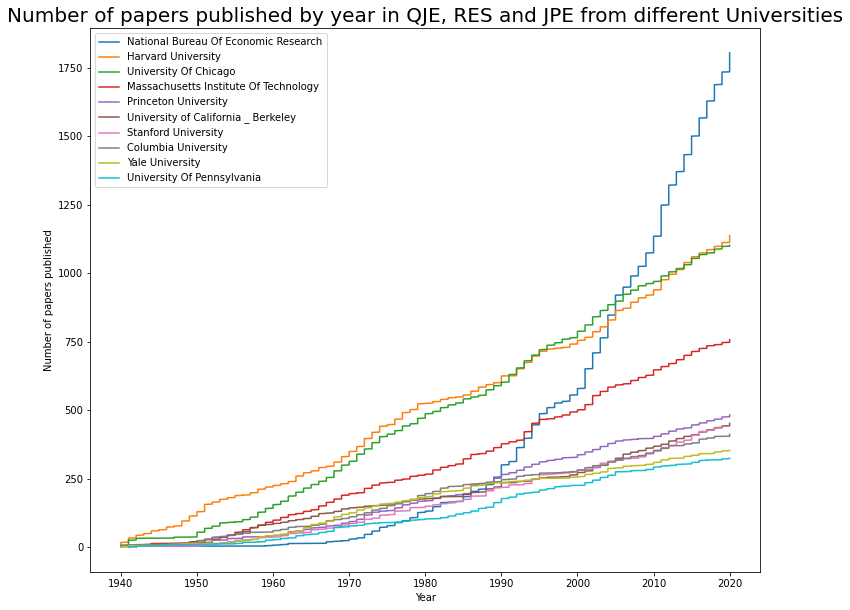

In [50]:
#Stacked plot on all years
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(a['year'],a['aff_cum_counts'], label = highest_vals_10.iat[0,1])
plt.plot(b['year'],b['aff_cum_counts'], label = highest_vals_10.iat[1,1])
plt.plot(c['year'],c['aff_cum_counts'], label = highest_vals_10.iat[2,1])
#plt.plot(d['year'],d['aff_cum_counts'], label = highest_vals_10.iat[3,1])
plt.plot(e['year'],e['aff_cum_counts'], label = highest_vals_10.iat[4,1])
plt.plot(f['year'],f['aff_cum_counts'], label = highest_vals_10.iat[5,1])
plt.plot(g['year'],g['aff_cum_counts'], label = highest_vals_10.iat[6,1])
plt.plot(h['year'],h['aff_cum_counts'], label = highest_vals_10.iat[7,1])
plt.plot(i['year'],i['aff_cum_counts'], label = highest_vals_10.iat[8,1])
plt.plot(j['year'],j['aff_cum_counts'], label = highest_vals_10.iat[9,1])
plt.plot(k['year'],k['aff_cum_counts'], label = highest_vals_10.iat[10,1])

plt.title('Number of papers published by year in QJE, RES and JPE from different Universities', fontsize=20)
plt.xlabel('Year')
plt.ylabel('Number of papers published')

plt.legend()
plt.show()